In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
# load the ecland data as ground truth

# select 2021/2022 from Global dataset for the evaluation
# start with ecland_i6aj_o400_2010_2022_6h_euro.zarr
ecland_eval = xr.open_zarr("/data/ecland_i6aj_o400_2010_2022_6h_euro.zarr").sel(time=slice("2021", "2022"))  
# train_ds = xr.open_zarr("/data/ecland_i6aj_o400_2010_2022_6h_euro.zarr")  # Europe subset


/data/conda/envs/ailand/lib/python3.12/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [13]:
ecland_eval

<xarray.Dataset> Size: 4GB
Dimensions:                     (x: 10051, clim_variable: 23, time: 2796,
                                 variable: 33)
Coordinates:
  * clim_variable               (clim_variable) object 184B 'clim_cell_area' ...
    lat                         (x) float32 40kB dask.array<chunksize=(10051,), meta=np.ndarray>
    lon                         (x) float32 40kB dask.array<chunksize=(10051,), meta=np.ndarray>
  * time                        (time) datetime64[ns] 22kB 2021-01-01 ... 202...
  * variable                    (variable) object 264B 'met_ctpf' ... 'es'
  * x                           (x) int32 40kB 15653 16004 ... 128483 128484
Data variables: (12/18)
    clim_data                   (x, clim_variable) float32 925kB dask.array<chunksize=(10051, 23), meta=np.ndarray>
    clim_maxs                   (clim_variable) float32 92B dask.array<chunksize=(23,), meta=np.ndarray>
    clim_means                  (clim_variable) float32 92B dask.array<chunksize=(23,), meta=np.ndarray>
    clim_mins                   (clim_variable) float32 92B dask.array<chunksize=(23,), meta=np.ndarray>
    clim_stdevs                 (clim_variable) float32 92B dask.array<chunksize=(23,), meta=np.ndarray>
    data                        (time, x, variable) float32 4GB dask.array<chunksize=(4, 10051, 33), meta=np.ndarray>
    ...                          ...
    global_data_1stdiff_means   (x, variable) float32 1MB dask.array<chunksize=(10051, 33), meta=np.ndarray>
    global_data_1stdiff_stdevs  (x, variable) float32 1MB dask.array<chunksize=(10051, 33), meta=np.ndarray>
    global_data_maxs            (x, variable) float32 1MB dask.array<chunksize=(10051, 33), meta=np.ndarray>
    global_data_means           (x, variable) float32 1MB dask.array<chunksize=(10051, 33), meta=np.ndarray>
    global_data_mins            (x, variable) float32 1MB dask.array<chunksize=(10051, 33), meta=np.ndarray>
    global_data_stdevs          (x, variable) float32 1MB dask.array<chunksize=(10051, 33), meta=np.ndarray>

In [3]:
clim_feat_lst = ['clim_clake',
            'clim_ctype',
            'clim_landsea',
            'clim_cu',
            'clim_cvh',
            'clim_cvl',
            'clim_geopot',
            'clim_sdfor',
            'clim_sdor',
            # 'clim_sotype',
            # 'clim_tvh',
            # 'clim_tvl',
            'clim_theta_cap',
            'clim_theta_pwp',
            'clim_veg_covh',
            'clim_veg_covl',
            'clim_veg_z0mh',
            'clim_veg_z0ml',
            'clim_veg_rsminh',
            'clim_veg_rsminl']


feat_lst = ['lai_hv', 
            'lai_lv', 
            'met_ctpf',
            'met_lwdown',
            'met_psurf',
            'met_qair',
            'met_rainf',
            'met_swdown',
            'met_snowf',
            'met_tair',
            'met_wind_e',
            'met_wind_n',
            'swvl1',
            'swvl2',
            'swvl3',
            'stl1',
            'stl2',
            'stl3',
            'snowc',
            'tsn',
            'rsn',
            'sd',
            'd2m',
            't2m',
            'skt',
            'sshf',
            'slhf',
            'dis',
            'es',
            'sro',
            'ssro',
           ]

targ_lst = ['swvl1',
            'swvl2',
            'swvl3',
            'stl1',
            'stl2',
            'stl3',
            'snowc',
            'tsn',
            'rsn',
            'sd',
            'd2m',
            't2m',
            'skt',
            'sshf',
            'slhf',
            'dis',
            'es',
            'sro',
            'ssro',
           ]

In [5]:
# collect both dynamic and static variables for evaluation
# static variable (climate variables) could be used for separate climate regions
# `clim_cvl`, `clim_cvh` - low/high vegetation cover fraction of gridcell
# `clim_sotype` - soil type
# `clim_veg_covl`, `clim_veg_covh` - average veg cover
# `clim_cu` - urban cover fraction
# `clim_glm` - glacier land mask

ecland_clim_var = (ecland_eval.sel(clim_variable=clim_feat_lst).clim_data
                 .expand_dims(time=ecland_eval.time)
                 .rename({"clim_variable": "variable"})
)

#ecland_clim_var = (ecland_eval.sel(clim_variable=clim_feat_lst).clim_data
#                 .expand_dims(time=ecland_eval.time)
#                 .isel(x=5284, time=slice(0,-1)) # here only select on data point x=5284
#                 .rename({"clim_variable": "variable"})
#)

#ecland_dyna_var = ecland_eval.sel(variable=feat_lst).isel(x=5284, time=slice(0,-1)).data # here only select on data point x=5284
ecland_dyna_var = ecland_eval.sel(variable=feat_lst).isel(time=slice(0,-1)).data

ecland_var = xr.concat((ecland_clim_var, ecland_dyna_var), dim="variable")

In [ ]:
# load the ML output data


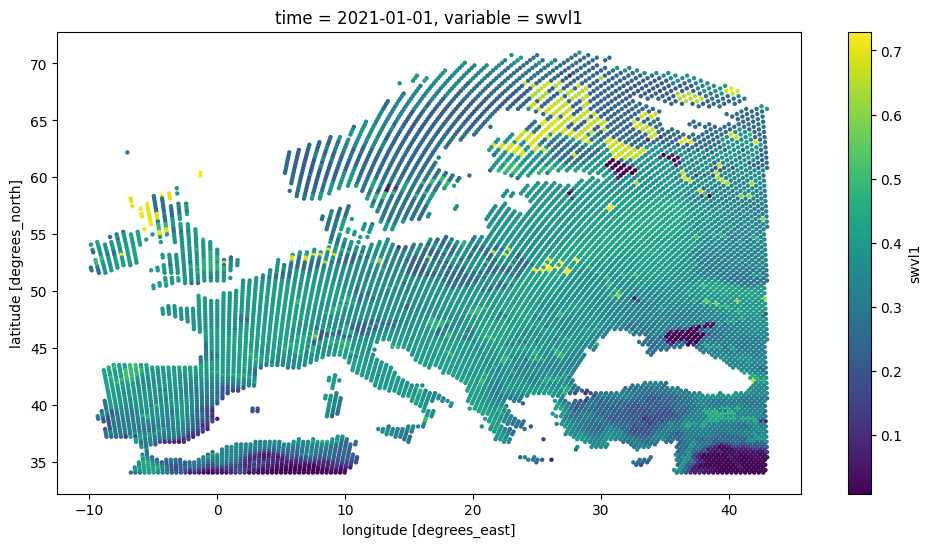

In [15]:
# spatial visualization

# Plotting soil moisture layer 1

# Assuming 'ecland_eval' is a DataArray with dimensions including 'time' and 'variable'
# and coordinates 'lon' and 'lat'.

# First, select the time index and variable
data_selected = ecland_var.isel(time=0).sel(variable="swvl1")

# Convert to a dataset if necessary (optional based on your data structure)
data_ds = data_selected.to_dataset(name='swvl1')

# Create the scatter plot
fig, ax = plt.subplots(figsize=(12, 6))
data_ds.plot.scatter(
    x="lon", y="lat", hue="swvl1", s=10, edgecolors="none", ax=ax
)
plt.show()

In [ ]:
#### spatial evaluation -- on the entire domain -- metric 1 ####